# Statement
size of dataset: 1872 images scraped from Google with 7 keywords(abandoned street in istanbul, ancient street in istanbul, istanbul street view, rich street in istanbul, slum street in istanbul, street element in istanbul, street life in istanbul) and 1147 images scraped from Instagram with 4 keywords(Colourful_Istanbul, Istanbul, Istanbul_streetlife, Istanbul_streets)

how I gathered data: I used data scraping skills to scrape these data from Google and Instagram, then I used SOM to get 100 folders named from 0_0 to 9_9 in which are  groups of pictures that are similar in some way 

datatype of the dataset: image format such as JPEG, PNG, GIF, WEBP

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def load_images_from_folder(folder, width, height):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            img = cv2.imread(os.path.join(folder,filename))
            if img is None:
                print(f"Error loading image: {filename}")
                continue
            try:
                img = cv2.resize(img, (width, height))
            except cv2.error as e:
                print(f"Error resizing image {filename}: {e}")
                continue
            images.append(img)
    return images


def pca_visualize(folder, width, height):
    # load images
    all_images = load_images_from_folder(folder, width, height)
    
    # convert images to numpy array
    all_images = np.array(all_images)
    num_images, h, w, c = all_images.shape
    
    # flatten images to 1D vectors
    flattened_images = np.reshape(all_images, (num_images, h*w*c))
    
    # perform PCA
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(flattened_images)
    
    # plot images
    fig, ax = plt.subplots()
    fig.set_size_inches(100, 80)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', labelsize=50)
    plt.xlim(transformed_data[:,0].min()-1, transformed_data[:,0].max()+1)
    plt.ylim(transformed_data[:,1].min()-1, transformed_data[:,1].max()+1)
    
    for i, (x,y) in enumerate(transformed_data):
        img = all_images[i]
        # convert image from BGR to RGB color space
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        im = ax.imshow(img, extent=[x-w*8, x+w*8, y-h*8, y+h*8], aspect='equal', cmap='gray')
         
    return fig



In [ ]:
folder = 'C:/Users/user/Documents/SOM/SOM/6_5'
width = 500
height = 500
fig = pca_visualize(folder, width, height)
plt.show()

# Define the filename and path to save the figure
filename = '6_5.png'
save_path = r'G:/skill report/julian6/PCA'

# Save the figure to the specified directory as a PNG file
fig.savefig(os.path.join(save_path, filename), dpi=300, bbox_inches='tight')

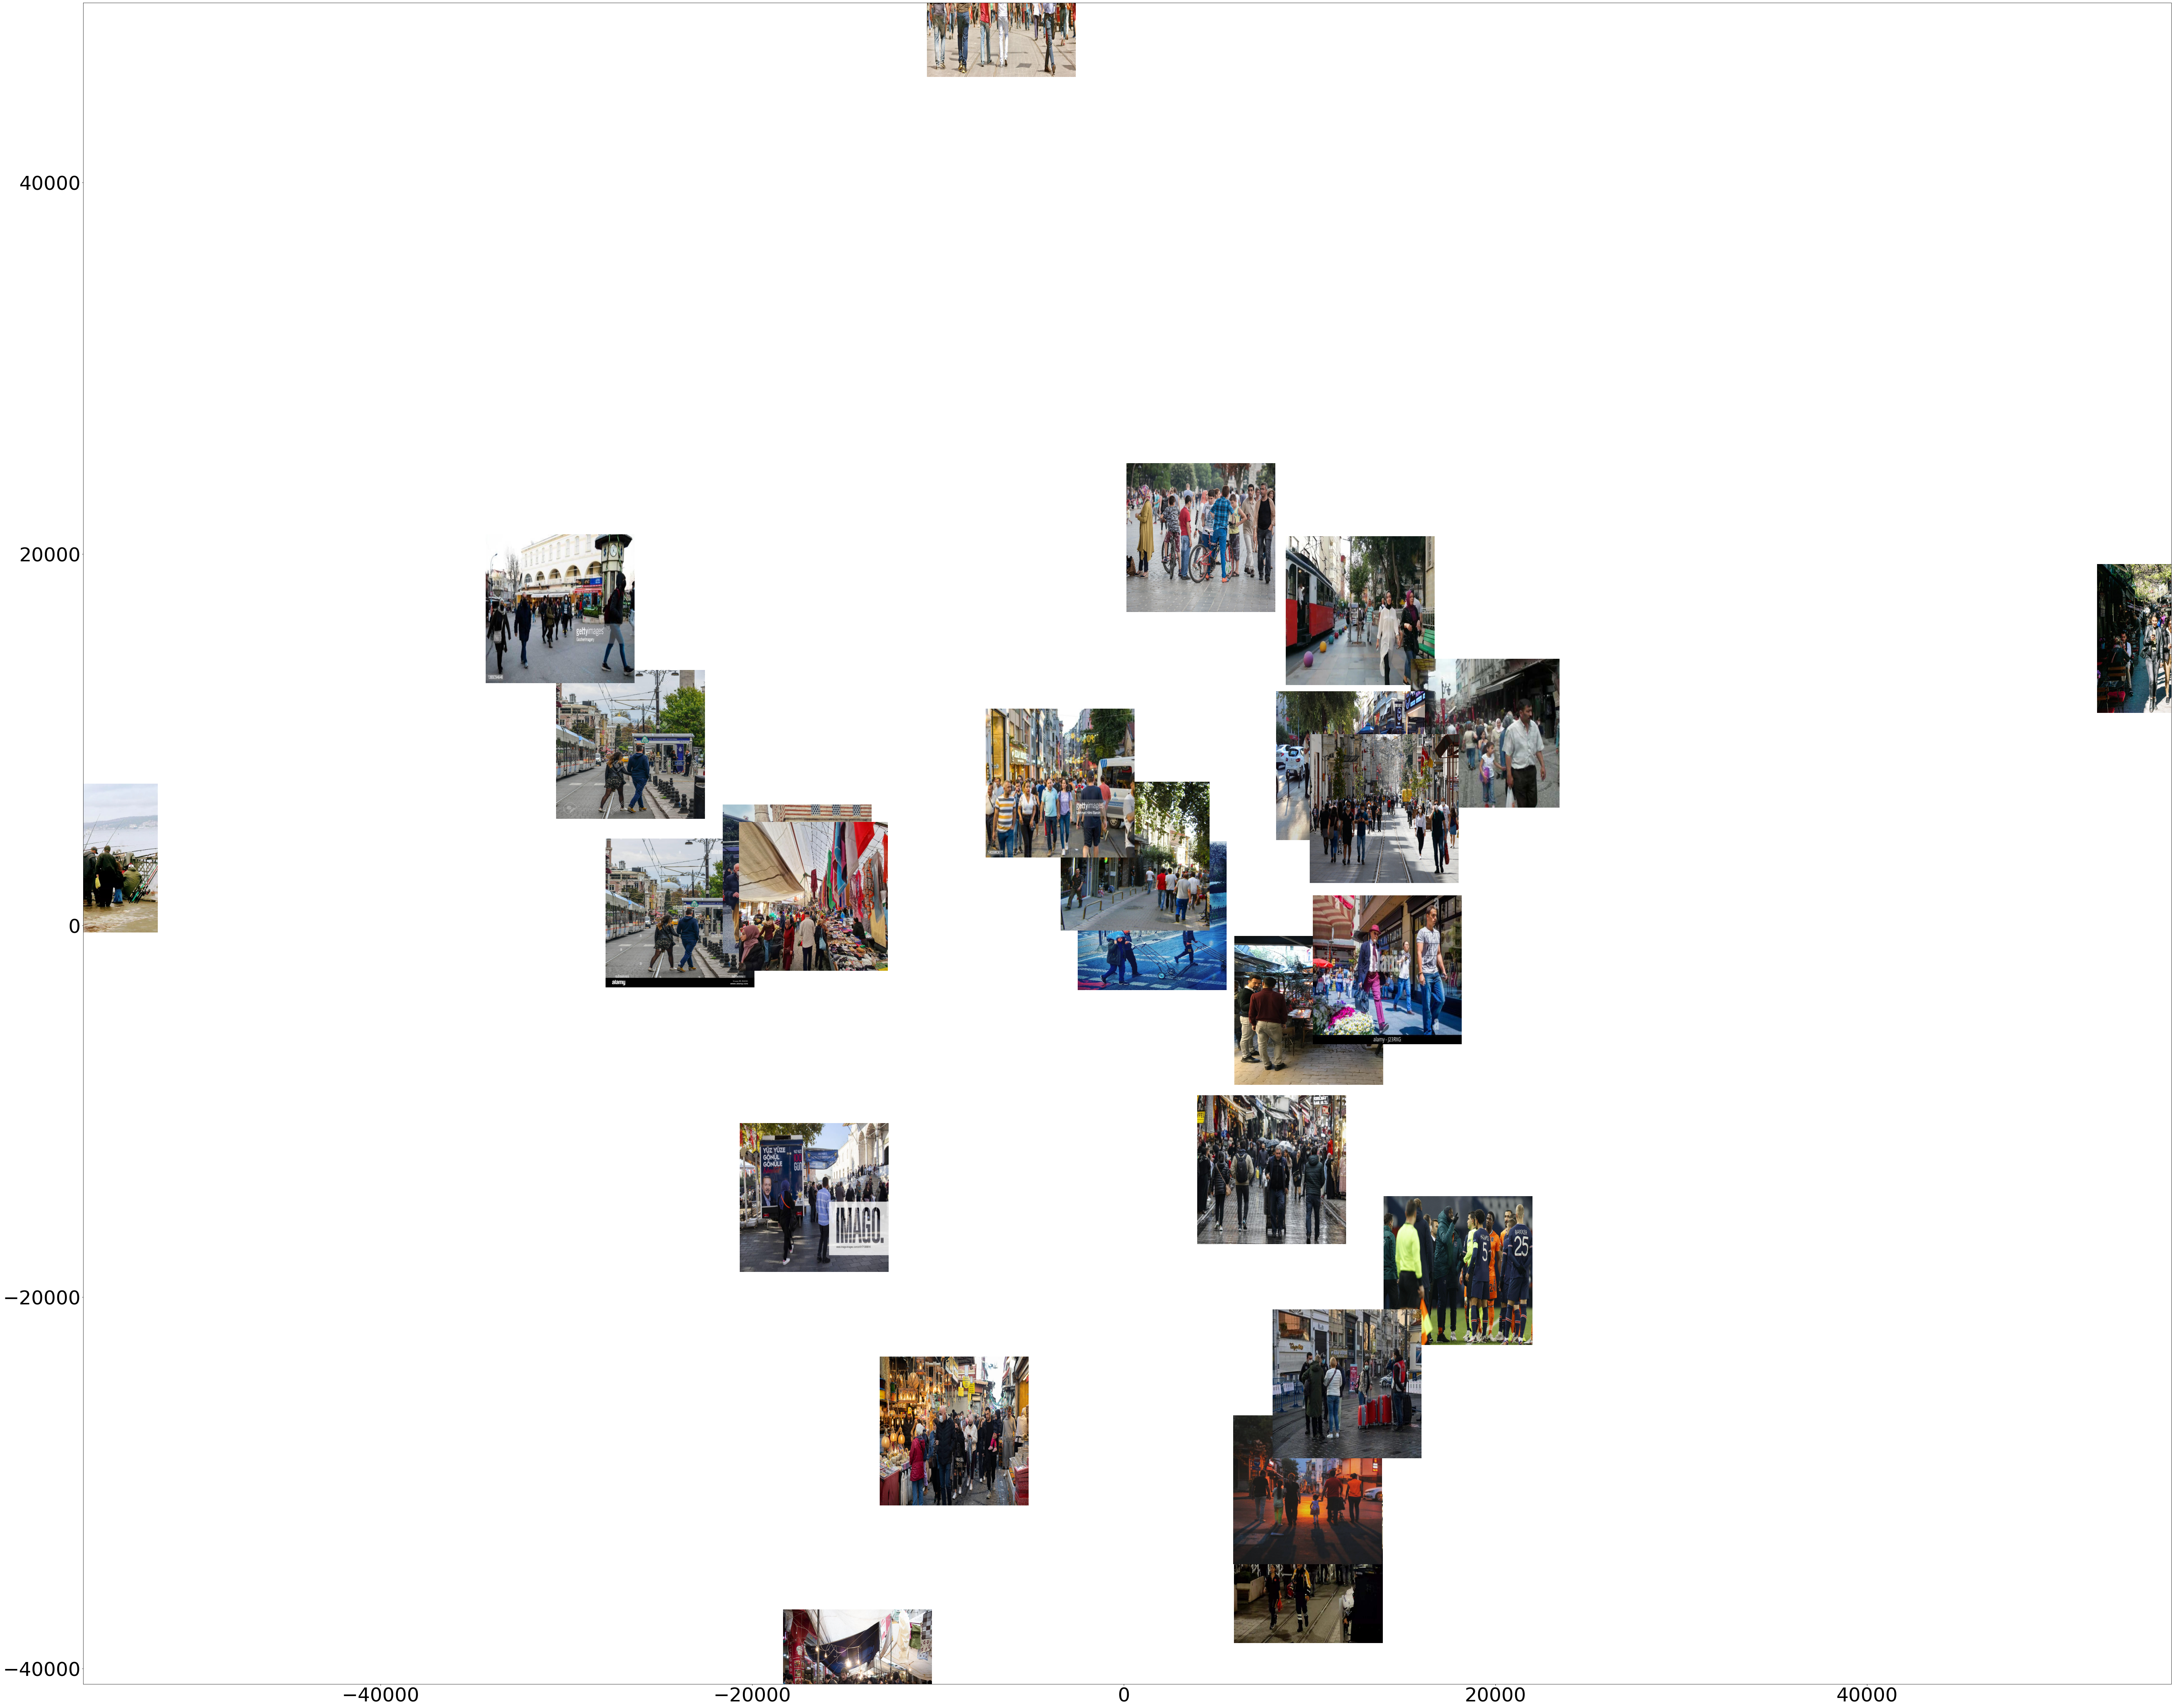

In [77]:
folder = 'C:/Users/user/Documents/SOM/SOM/9_9'
width = 500
height = 500
fig = pca_visualize(folder, width, height)
plt.show()